In [1055]:
import pandas as pd
import re

from datetime import datetime,date,timedelta 
import datetime as dt
import time
from collections import Counter
import emoji
import glob

In [1056]:
# Visualisation libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.express as px
import plotly.figure_factory as ff
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [1057]:
df = pd.read_csv("covid19.csv", encoding="utf-8",parse_dates=["date","time"])

In [1058]:
df.columns

Index(['Unnamed: 0', 'id', 'tweet', 'location', 'date', 'time', 'user'], dtype='object')

In [1059]:
df.head()

,Unnamed: 0,id,tweet,location,date,time,user
0,3202222,1223456896276819968,@seleshi_b_a ጫጫታ በፈለገችው መንገድ ትምጣ፣ አሜሪካም፣ ሆነች፣ ...,NaN,2020-02-01,0 days 05:03:49.000000000,WenduEyob
1,3202223,1223457155786952705,@tigistAA በሉስኪ ሃየ ጠየቅቲ! https://t.co/EBcFzqWFvs,NaN,2020-02-01,0 days 05:04:51.000000000,IamFilmona
2,3202224,1223457263777533952,@sesujipi_nnn እኔ ጃፓንኛ ነኝ,NaN,2020-02-01,0 days 05:05:17.000000000,eboshi_____abc
3,3202225,1223457335827402754,@abrmine @Yohannes_v @Dehistoryes ናየማ ብሽጉጥ እጁ,NaN,2020-02-01,0 days 05:05:34.000000000,AtsbehaTomas
4,3202226,1223457389875277824,RT @Haikel_Tes: #Bond2HealEritrea ኣነ ሓላዊት ሓፍ...,NaN,2020-02-01,0 days 05:05:47.000000000,Abraham71848633


In [1060]:
def find_url(string): 
    text = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',string)
    return "".join(text)

In [1061]:
def remove_url(data):
    
    return data.replace(find_url(data),"")




def remove_user(user):
    return re.sub('(@\w+)','', user)

def save_tweet(df, feature, query):
    tweet_by_date = []
    #tweet = df.tweet[df.feature == query]
    #if feature is date
        #query_range
        #df.feature(query_large- df.feateure[query_small])
        
    if(feature!="date"):    
        tweet = df.tweet[df.loc[:,feature]== query]
        file = "tweet_" + query +".csv"
        tweet.to_csv(file,index=False)
    else:
        
        lower_bound, upper_bound = query.split(":")[0],duration.split(":")[1]
        upper = datetime.strptime(upper_bound,"%Y-%m-%d")
        lower = datetime.strptime(lower_bound,"%Y-%m-%d")
        diff = int(str(pd.to_timedelta(upper - lower))[0])
        for i in range(diff+1):
            
            d= lower + timedelta(i)
            tweet_by_date.append(list(df.tweet[df.loc[:,feature]== d]))
            
        tweet_df= pd.DataFrame(tweet_by_date)
        tweet_df.to_csv("TweetDate.csv", index=False)

In [1062]:
df = df.drop('Unnamed: 0', axis=1)

In [1063]:
df.head()

,id,tweet,location,date,time,user
0,1223456896276819968,@seleshi_b_a ጫጫታ በፈለገችው መንገድ ትምጣ፣ አሜሪካም፣ ሆነች፣ ...,NaN,2020-02-01,0 days 05:03:49.000000000,WenduEyob
1,1223457155786952705,@tigistAA በሉስኪ ሃየ ጠየቅቲ! https://t.co/EBcFzqWFvs,NaN,2020-02-01,0 days 05:04:51.000000000,IamFilmona
2,1223457263777533952,@sesujipi_nnn እኔ ጃፓንኛ ነኝ,NaN,2020-02-01,0 days 05:05:17.000000000,eboshi_____abc
3,1223457335827402754,@abrmine @Yohannes_v @Dehistoryes ናየማ ብሽጉጥ እጁ,NaN,2020-02-01,0 days 05:05:34.000000000,AtsbehaTomas
4,1223457389875277824,RT @Haikel_Tes: #Bond2HealEritrea ኣነ ሓላዊት ሓፍ...,NaN,2020-02-01,0 days 05:05:47.000000000,Abraham71848633


In [1064]:
#Converting to datetime
df.date = pd.to_datetime(df.date)
df.time = pd.to_timedelta(df.time)                            

In [1065]:
df.head()

,id,tweet,location,date,time,user
0,1223456896276819968,@seleshi_b_a ጫጫታ በፈለገችው መንገድ ትምጣ፣ አሜሪካም፣ ሆነች፣ ...,NaN,2020-02-01,05:03:49,WenduEyob
1,1223457155786952705,@tigistAA በሉስኪ ሃየ ጠየቅቲ! https://t.co/EBcFzqWFvs,NaN,2020-02-01,05:04:51,IamFilmona
2,1223457263777533952,@sesujipi_nnn እኔ ጃፓንኛ ነኝ,NaN,2020-02-01,05:05:17,eboshi_____abc
3,1223457335827402754,@abrmine @Yohannes_v @Dehistoryes ናየማ ብሽጉጥ እጁ,NaN,2020-02-01,05:05:34,AtsbehaTomas
4,1223457389875277824,RT @Haikel_Tes: #Bond2HealEritrea ኣነ ሓላዊት ሓፍ...,NaN,2020-02-01,05:05:47,Abraham71848633


In [1066]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268960 entries, 0 to 268959
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype          
---  ------    --------------   -----          
 0   id        268960 non-null  int64          
 1   tweet     268960 non-null  object         
 2   location  2952 non-null    object         
 3   date      268960 non-null  datetime64[ns] 
 4   time      268960 non-null  timedelta64[ns]
 5   user      268960 non-null  object         
dtypes: datetime64[ns](1), int64(1), object(3), timedelta64[ns](1)
memory usage: 12.3+ MB


In [1067]:
#Remove [URL, colon,user] from tweet
df.tweet = df.tweet.str.replace('http\S+|www.\S+|:|@\S+','', case=False)
#Remove colon

#remove emojies from tweet
def remove_emoji(tweet):
    tweet = emoji.demojize(tweet)
    re.sub('(:\S+)','', tweet)
    return tweet

df.tweet = df.tweet.apply(lambda x: remove_emoji(x)) ## Takes longer running time

In [1068]:
#dataframe after URL, colon and user removed from tweet
df.head()

,id,tweet,location,date,time,user
0,1223456896276819968,ጫጫታ በፈለገችው መንገድ ትምጣ፣ አሜሪካም፣ ሆነች፣ አለም ባንክ ብድራቸ...,NaN,2020-02-01,05:03:49,WenduEyob
1,1223457155786952705,በሉስኪ ሃየ ጠየቅቲ!,NaN,2020-02-01,05:04:51,IamFilmona
2,1223457263777533952,እኔ ጃፓንኛ ነኝ,NaN,2020-02-01,05:05:17,eboshi_____abc
3,1223457335827402754,ናየማ ብሽጉጥ እጁ,NaN,2020-02-01,05:05:34,AtsbehaTomas
4,1223457389875277824,RT #Bond2HealEritrea ኣነ ሓላዊት ሓፍተይ ኢየ ኣነ ሓላዊ...,NaN,2020-02-01,05:05:47,Abraham71848633


In [1069]:
#save tweet by date
save_tweet(df, "date", '2020-03-20:2020-03-25')

#When saving a tweet by range of dates use the date as [Lower:Upper]

#save tweet by user
save_tweet(df,'user', "lia_tadesse")

In [1071]:
#Top tweets based on location
countries = list(df.location[df.location.notnull()])
Counter(countries).most_common(10)

[('Ethiopia', 1756),
 ('United States', 469),
 ('Switzerland', 165),
 ('Germany', 156),
 ('France', 79),
 ('Australia', 58),
 ('Kingdom of Saudi Arabia', 46),
 ('Italy', 32),
 ('United Arab Emirates', 26),
 ('Canada', 25)]

In [1072]:
#selecting tweet based on keyword
keyword = ["ኮቪድ", "ኮሮና", "ቫይረስ", "ወረርሽኝ", "ኳራንቲን", "ማስክ", "ሳኒታይዘር",
           "ሴኒታይዘር", "ውሽባ", "ወሸባ", "ውሸባ", "ማህበራዊ ርቀት", "በሽታ","ማገገም","ተጋላጭ","ሳሙና"]



tweets = []

for tweet in df.tweet:
    for key in keyword:
        if(key in tweet):
            tweets.append(tweet)
            break

tweet_df = pd.DataFrame(tweets) 
tweet_df.to_csv("tweets.csv",index=False,header=None)

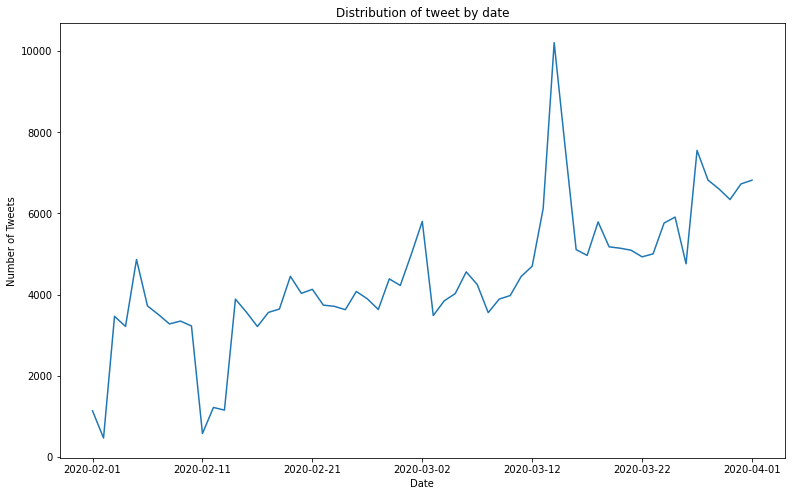

In [1147]:
import seaborn as sns

Date_counter = []

for d in df.date:
    Date_counter.append(str(d.date()))
    
#Date_counter

dd = Counter(Date_counter)
Date = dd.keys()
Count = dd.values()

Cnt = pd.DataFrame(columns=["Date","Count"])
Cnt['Date'] = Date
Cnt['Count'] = Count

Cnt.plot(kind='line', x='Date', y='Count',figsize=(13,8),legend=False)
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.title("Distribution of tweet by date")
plt.show()

In [1103]:
df['date'].value_counts().iplot(kind='bar',
                              yTitle='Percentage', 
                              linecolor='black', 
                              opacity=0.8,
                              color='red',
                              theme='pearl',
                              bargap=0.5,
                              gridcolor='white',
                                                     
                              title='Distribution of tweet by date')

In [1074]:
covid = df[df.tweet.str.contains("ኮቪድ|ኮሮና|ቫይረስ|ወረርሽኝ|ኳራንቲን|ማስክ|ሳኒታይዘር|\
                                 ሴኒታይዘር|ውሽባ|ወሸባ|ውሸባ|ማህበራዊ ርቀት|በሽታ|ማገገም|ተጋላጭ|ሳሙና")]

In [1075]:
covid.head()

,id,tweet,location,date,time,user
10,1223457866813779970,በቃ ኢቦላ በኮሮና ቫይረስ ተተካ,United States,2020-02-01,05:07:40,habesha_lov
138,1223643294229504001,#Ethiopia ኮሮና ቫይረስ ወዳገራችን እንዳይገባ የኢትዮጵያ አየር መን...,NaN,2020-02-01,17:24:30,EthioReference
189,1223648180992122881,ኮሮና ወደ ታላቋ አሜሪካ መግባቱን በሰማን ጊዜ የጉዞዋችን ተስፋና ዝግጅት...,NaN,2020-02-01,17:43:55,DBq2Yj7M4FE7B58
210,1223649723833339911,ከኮሮና ቫይረስ ስርጭት ጋር በተያያዘ የ #Ethiopia|n አየር መንገድ...,NaN,2020-02-01,17:50:03,RealMikiyas
468,1223671449245900800,(VOE-DC) ኮሮናቫይረስ እዋናዊ ሓበረታ- ብሚኒስትሪ ጥዕና ኣመሪካ,NaN,2020-02-01,19:16:22,AlulaFre


In [1076]:
covid['text_len'] = covid.tweet.astype(str).apply(len)
covid['word_count'] = covid.tweet.apply(lambda x: len(str(x).split()))

In [1077]:
covid.head()

,id,tweet,location,date,time,user,text_len,word_count
10,1223457866813779970,በቃ ኢቦላ በኮሮና ቫይረስ ተተካ,United States,2020-02-01,05:07:40,habesha_lov,20,5
138,1223643294229504001,#Ethiopia ኮሮና ቫይረስ ወዳገራችን እንዳይገባ የኢትዮጵያ አየር መን...,NaN,2020-02-01,17:24:30,EthioReference,114,19
189,1223648180992122881,ኮሮና ወደ ታላቋ አሜሪካ መግባቱን በሰማን ጊዜ የጉዞዋችን ተስፋና ዝግጅት...,NaN,2020-02-01,17:43:55,DBq2Yj7M4FE7B58,58,12
210,1223649723833339911,ከኮሮና ቫይረስ ስርጭት ጋር በተያያዘ የ #Ethiopia|n አየር መንገድ...,NaN,2020-02-01,17:50:03,RealMikiyas,90,18
468,1223671449245900800,(VOE-DC) ኮሮናቫይረስ እዋናዊ ሓበረታ- ብሚኒስትሪ ጥዕና ኣመሪካ,NaN,2020-02-01,19:16:22,AlulaFre,44,7


In [1078]:
covid['text_len'].iplot(
    kind='hist',
    xTitle='text length',
    linecolor='black',
    color='red',
    yTitle='count',
    title='Covid Text Length Distribution')

In [1079]:
covid['word_count'].iplot(
    kind='hist',
    xTitle='Number of words',
    linecolor='black',
    color='red',
    yTitle='count',
    title='Covid Word Distribution')

In [1080]:
def get_top_n_words(corpus,n_gram_range, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(n_gram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [1081]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

unigrams = get_top_n_words(covid.tweet,(1,1),20)


In [1082]:
unigrams

[('rt', 12690),
 ('ቫይረስ', 9662),
 ('የኮሮና', 5757),
 ('ኮሮና', 4913),
 ('ነው', 4696),
 ('እና', 4193),
 ('ለመከላከል', 2698),
 ('ላይ', 2604),
 ('በኮሮና', 2507),
 ('19', 1944),
 ('ሰዎች', 1775),
 ('አንድ', 1541),
 ('በሽታ', 1528),
 ('ውስጥ', 1438),
 ('ወደ', 1422),
 ('ጋር', 1418),
 ('ኣብ', 1367),
 ('ሰው', 1360),
 ('አበባ', 1212),
 ('ቫይረስን', 1161)]

In [1083]:
#most common words
covid['word_list'] = covid.tweet.apply(lambda x: str(x).split())
top_words = [word for row in covid.word_list for word in row]
top_words = Counter(top_words)

top = pd.DataFrame(top_words.most_common(30))
top.columns = ["word","count"]
top.head()

,word,count
0,RT,12684
1,ቫይረስ,9404
2,የኮሮና,5692
3,ኮሮና,4494
4,እና,4157


In [1084]:
fig = px.bar(top, x='word',y='count', orientation='v', width=800, height=600, 
             title="Top 30 common words",color='word')

fig.show()

In [1085]:
fig = px.treemap(top, path=['word'], values='count',title='Tree of Most Common Words')
fig.show()

### Adding Data from John Hopkins

In [1086]:
files = glob.glob("csse_covid_19_daily_reports/*.csv")

In [1087]:
Ethio_data = pd.DataFrame(columns=['Country_Region','Confirmed','Deaths','Recovered','Active','Last_Update'])

In [1088]:
for f in files:
    data = pd.read_csv(f)
    if(len(data.columns)>10):
        if(list(data.Country_Region[data.Country_Region == 'Ethiopia'].notnull())):
            d = data[data.Country_Region=='Ethiopia']
            d = d[['Country_Region','Confirmed','Deaths','Recovered','Active','Last_Update']]
            Ethio_data = pd.concat([Ethio_data,d])

In [1089]:
Ethio_data.to_csv("JohnHopkin_Data.csv",index=False)
covid.to_csv("Twitter_Data.csv",index=False)

In [1090]:
John_Hopkin = pd.read_csv("JohnHopkin_Data.csv", parse_dates = ["Last_Update"])
#Ethio_data = Ethio_data.drop("Unnamed: 0", axis=1)
Twitter = pd.read_csv("Twitter_Data.csv", parse_dates=["time"])

In [1091]:
John_Hopkin.head()

,Country_Region,Confirmed,Deaths,Recovered,Active,Last_Update
0,Ethiopia,389,5,122,262.0,2020-05-21 02:32:48
1,Ethiopia,5175,81,1544,3550.0,2020-06-26 04:33:43
2,Ethiopia,12,0,0,12.0,2020-03-25 23:33:04
3,Ethiopia,1063,8,208,847.0,2020-05-31 02:32:45
4,Ethiopia,4848,75,1412,3361.0,2020-06-24 04:33:28


In [1092]:
John_Hopkin

,Country_Region,Confirmed,Deaths,Recovered,Active,Last_Update
0,Ethiopia,389,5,122,262.0,2020-05-21 02:32:48
1,Ethiopia,5175,81,1544,3550.0,2020-06-26 04:33:43
2,Ethiopia,12,0,0,12.0,2020-03-25 23:33:04
3,Ethiopia,1063,8,208,847.0,2020-05-31 02:32:45
4,Ethiopia,4848,75,1412,3361.0,2020-06-24 04:33:28
...,...,...,...,...,...,...
154,Ethiopia,16,0,1,15.0,2020-03-28 23:05:00
155,Ethiopia,11524,188,5506,5830.0,2020-07-23 05:15:04
156,Ethiopia,9503,167,2430,6906.0,2020-07-20 05:34:40
157,Ethiopia,56,2,4,50.0,2020-04-09 23:02:19


In [1093]:
Twitter.time = pd.to_timedelta(Twitter.time)

In [1094]:
Twitter.head()

,id,tweet,location,date,time,user,text_len,word_count,word_list
0,1223457866813779970,በቃ ኢቦላ በኮሮና ቫይረስ ተተካ,United States,2020-02-01,05:07:40,habesha_lov,20,5,"['በቃ', 'ኢቦላ', 'በኮሮና', 'ቫይረስ', 'ተተካ']"
1,1223643294229504001,#Ethiopia ኮሮና ቫይረስ ወዳገራችን እንዳይገባ የኢትዮጵያ አየር መን...,NaN,2020-02-01,17:24:30,EthioReference,114,19,"['#Ethiopia', 'ኮሮና', 'ቫይረስ', 'ወዳገራችን', 'እንዳይገባ..."
2,1223648180992122881,ኮሮና ወደ ታላቋ አሜሪካ መግባቱን በሰማን ጊዜ የጉዞዋችን ተስፋና ዝግጅት...,NaN,2020-02-01,17:43:55,DBq2Yj7M4FE7B58,58,12,"['ኮሮና', 'ወደ', 'ታላቋ', 'አሜሪካ', 'መግባቱን', 'በሰማን', ..."
3,1223649723833339911,ከኮሮና ቫይረስ ስርጭት ጋር በተያያዘ የ #Ethiopia|n አየር መንገድ...,NaN,2020-02-01,17:50:03,RealMikiyas,90,18,"['ከኮሮና', 'ቫይረስ', 'ስርጭት', 'ጋር', 'በተያያዘ', 'የ', '..."
4,1223671449245900800,(VOE-DC) ኮሮናቫይረስ እዋናዊ ሓበረታ- ብሚኒስትሪ ጥዕና ኣመሪካ,NaN,2020-02-01,19:16:22,AlulaFre,44,7,"['(VOE-DC)', 'ኮሮናቫይረስ', 'እዋናዊ', 'ሓበረታ-', 'ብሚኒስ..."


In [1095]:
John_Hopkin['Date'] = John_Hopkin.Last_Update.dt.date
John_Hopkin['Time'] = John_Hopkin.Last_Update.dt.time



In [1096]:
John_Hopkin.head()

,Country_Region,Confirmed,Deaths,Recovered,Active,Last_Update,Date,Time
0,Ethiopia,389,5,122,262.0,2020-05-21 02:32:48,2020-05-21,02:32:48
1,Ethiopia,5175,81,1544,3550.0,2020-06-26 04:33:43,2020-06-26,04:33:43
2,Ethiopia,12,0,0,12.0,2020-03-25 23:33:04,2020-03-25,23:33:04
3,Ethiopia,1063,8,208,847.0,2020-05-31 02:32:45,2020-05-31,02:32:45
4,Ethiopia,4848,75,1412,3361.0,2020-06-24 04:33:28,2020-06-24,04:33:28


In [1097]:
Twitter.head()

,id,tweet,location,date,time,user,text_len,word_count,word_list
0,1223457866813779970,በቃ ኢቦላ በኮሮና ቫይረስ ተተካ,United States,2020-02-01,05:07:40,habesha_lov,20,5,"['በቃ', 'ኢቦላ', 'በኮሮና', 'ቫይረስ', 'ተተካ']"
1,1223643294229504001,#Ethiopia ኮሮና ቫይረስ ወዳገራችን እንዳይገባ የኢትዮጵያ አየር መን...,NaN,2020-02-01,17:24:30,EthioReference,114,19,"['#Ethiopia', 'ኮሮና', 'ቫይረስ', 'ወዳገራችን', 'እንዳይገባ..."
2,1223648180992122881,ኮሮና ወደ ታላቋ አሜሪካ መግባቱን በሰማን ጊዜ የጉዞዋችን ተስፋና ዝግጅት...,NaN,2020-02-01,17:43:55,DBq2Yj7M4FE7B58,58,12,"['ኮሮና', 'ወደ', 'ታላቋ', 'አሜሪካ', 'መግባቱን', 'በሰማን', ..."
3,1223649723833339911,ከኮሮና ቫይረስ ስርጭት ጋር በተያያዘ የ #Ethiopia|n አየር መንገድ...,NaN,2020-02-01,17:50:03,RealMikiyas,90,18,"['ከኮሮና', 'ቫይረስ', 'ስርጭት', 'ጋር', 'በተያያዘ', 'የ', '..."
4,1223671449245900800,(VOE-DC) ኮሮናቫይረስ እዋናዊ ሓበረታ- ብሚኒስትሪ ጥዕና ኣመሪካ,NaN,2020-02-01,19:16:22,AlulaFre,44,7,"['(VOE-DC)', 'ኮሮናቫይረስ', 'እዋናዊ', 'ሓበረታ-', 'ብሚኒስ..."


In [1098]:
time = list(Twitter.time)
TW =[str(t)[7:] for t in time ]

JH = [str(t) for t in John_Hopkin.Time]

In [1099]:
len(TW), len(JH)

(24441, 159)

In [901]:
for t in TW:
    if t in JH:
        print(t)

22:45:13
04:34:55
04:33:21
04:27:42
23:36:27
04:33:20
04:34:00
22:32:28
04:27:48
04:27:29
22:32:28
23:04:29
04:34:30
04:27:48
04:33:51
04:34:46
22:52:00
22:53:48
03:33:03
22:51:39
04:34:58
22:51:39
